In [1]:
import pandas as monem
import seaborn as monem2
import matplotlib.pyplot as monem3
import numpy as monem4
from scipy import stats

In [2]:
excel_path = r'A:\Project Requirements\Diabetes Dataset.csv'
data = monem.read_csv("A:\Project Requirements\Diabetes Dataset.csv")
display(monem.DataFrame(data))


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [81]:
# Correlation Matrix
correlation_matrix = data.select_dtypes(include='number').corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose              

C:\Users\abdel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


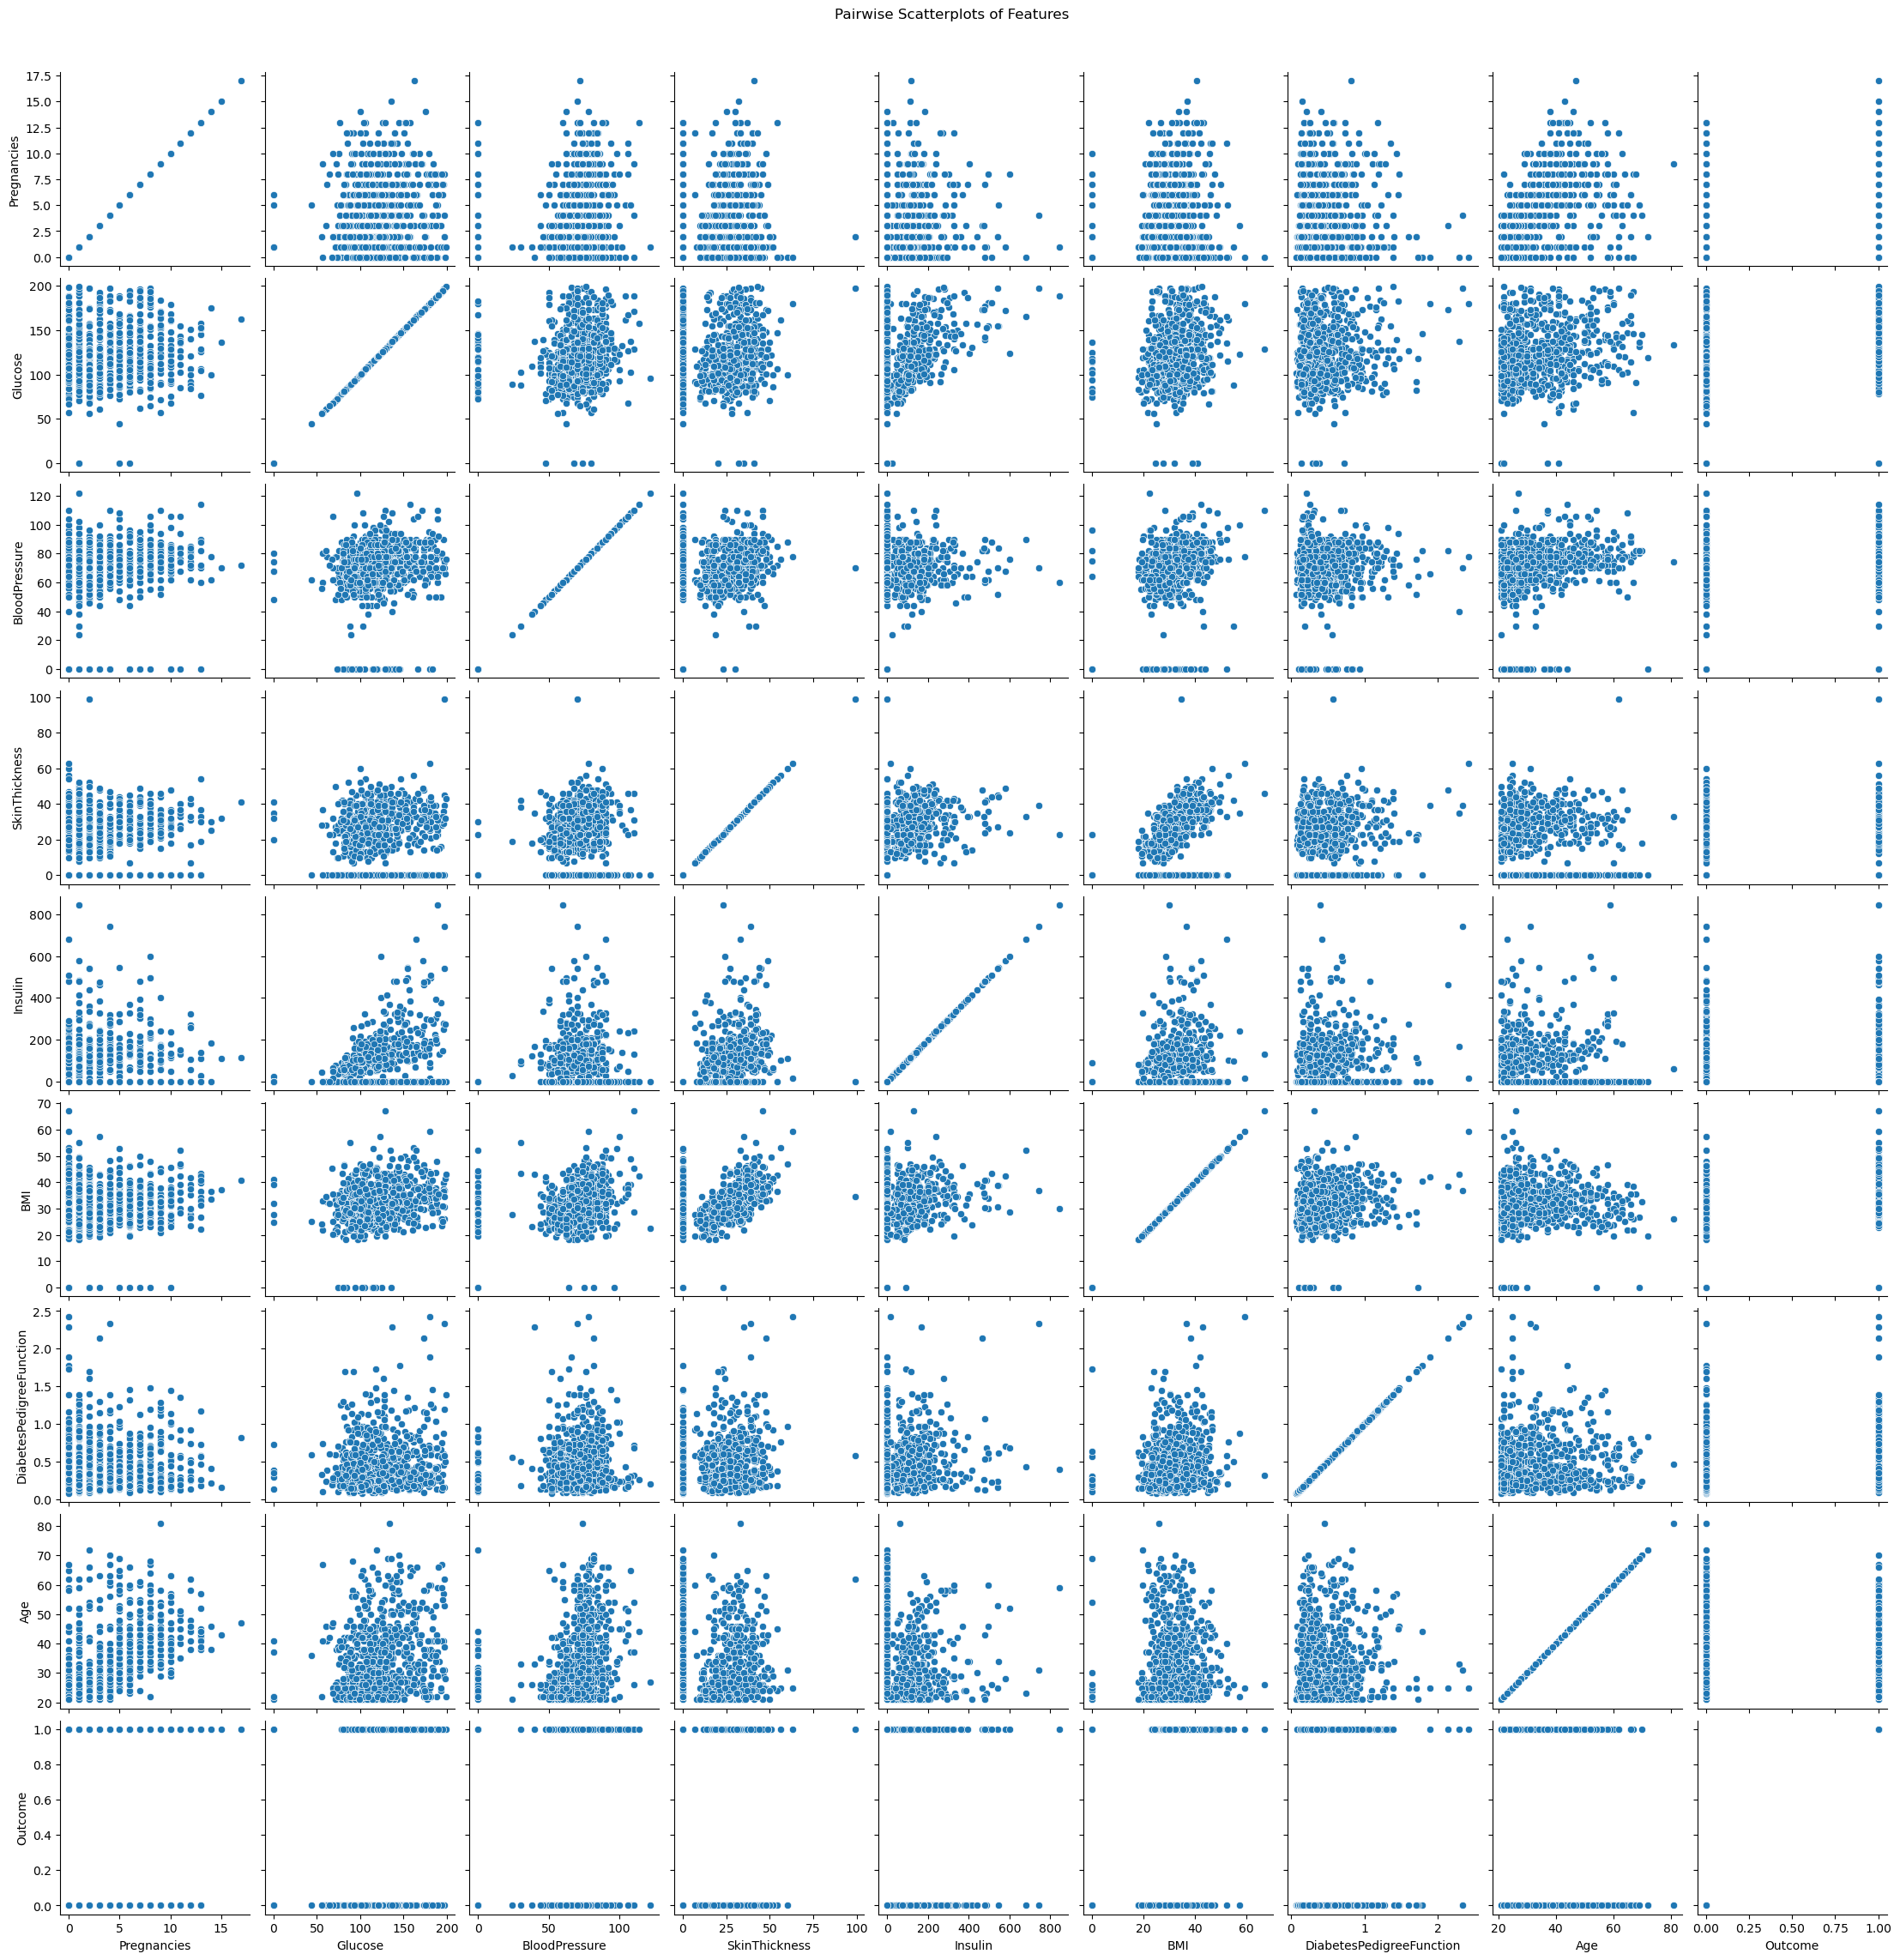

In [13]:
# scatterplot matrix
monem2.pairplot(data, height=2.5, diag_kind=None)
monem3.suptitle('Pairwise Scatterplots of Features', y=1.02)
monem3.show()

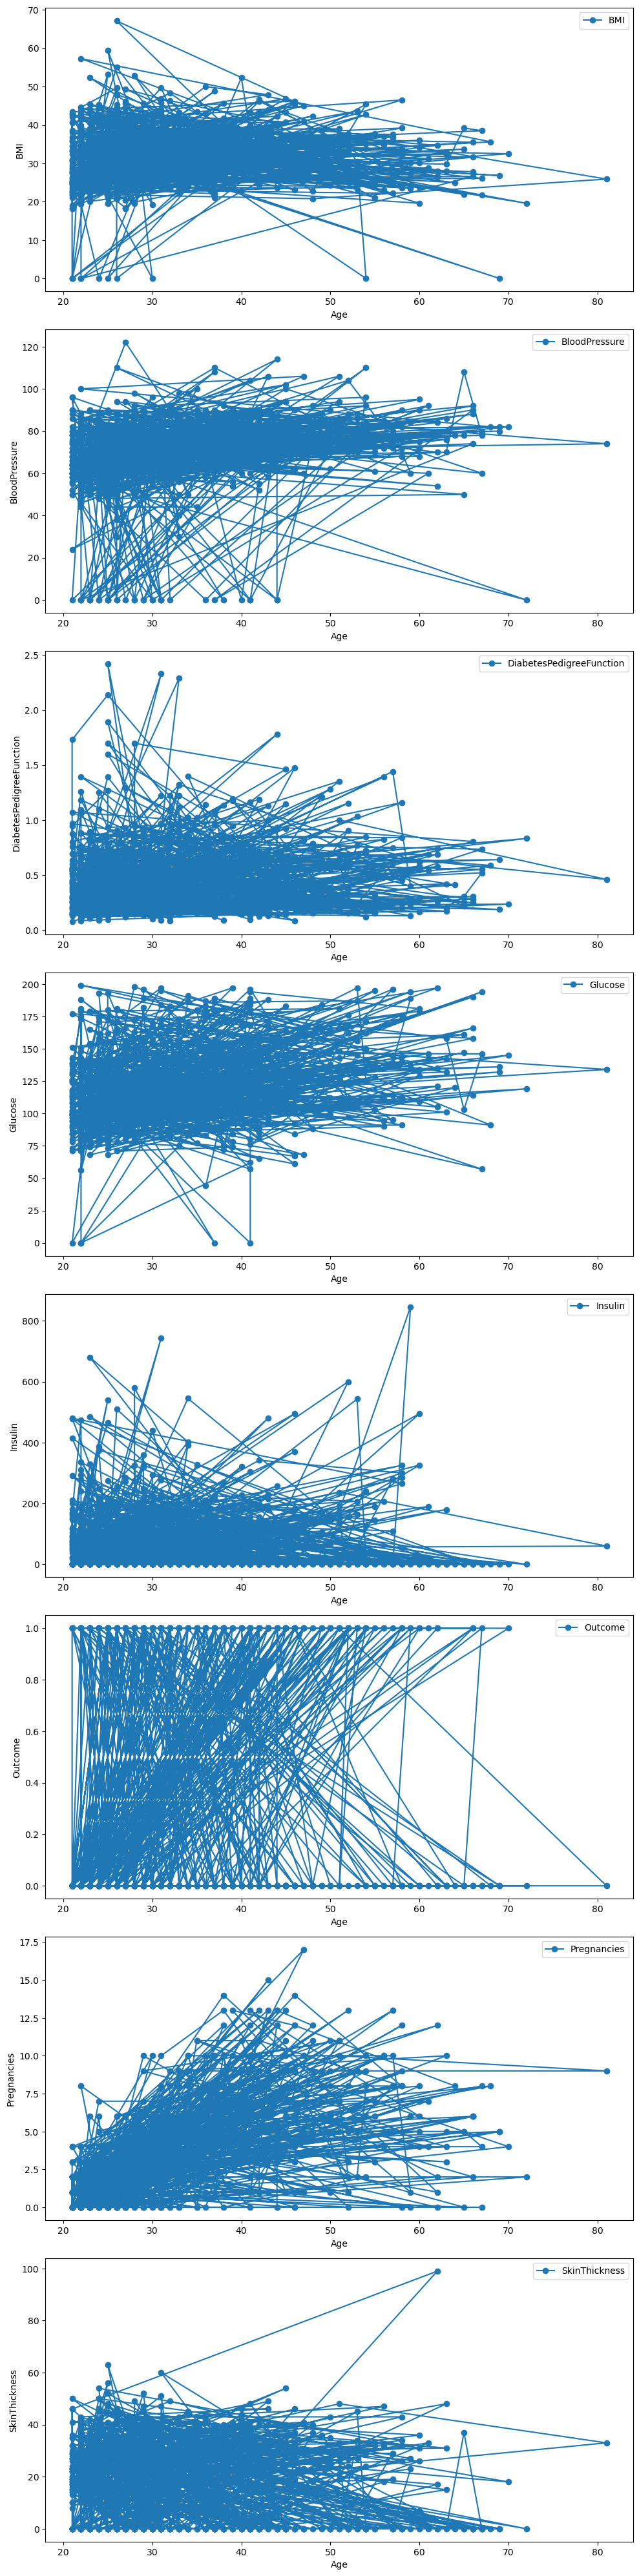

In [11]:
#Line Plots
# Get features except age
features = data.columns.difference(['Age'])
# Set up the matplotlib figure with subplots
fig, axes = monem3.subplots(nrows=len(features), ncols=1, figsize=(10, 5 * len(features)))

# Iterate through each feature and plot it against 'Age'
for i, feature in enumerate(features):
    axes[i].plot(data['Age'], data[feature], marker='o', linestyle='-', label=feature)
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(feature)
    axes[i].legend()
    
monem3.tight_layout()
# Show the plot
monem3.show()


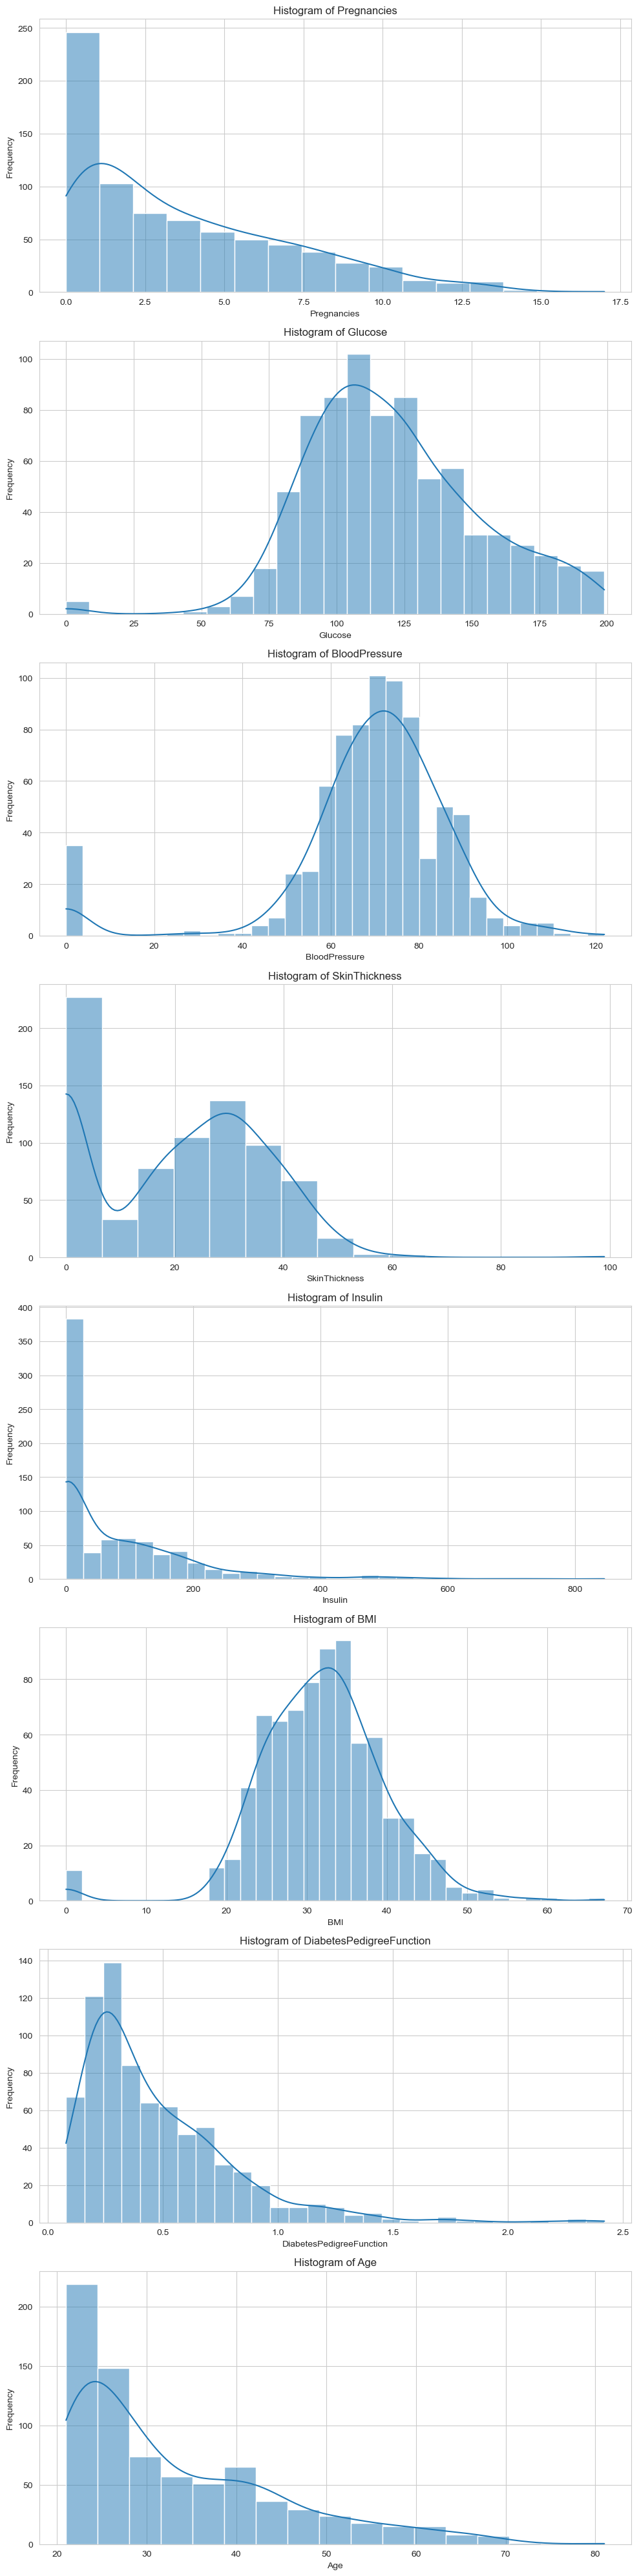

In [16]:
# Set the style of seaborn
monem2.set_style("whitegrid")
# Exclude Outcome
features_to_plot = data.columns.drop('Outcome')
# Create a figure and a set of subplots
fig, axs = monem3.subplots(len(features_to_plot), 1, figsize=(10, 5 * len(features_to_plot)))
# Flatten the array of axes if there is more than one row
if len(features_to_plot) > 1:
    axs = axs.flatten()
# Iterate over each feature to create a histogram
for i, feature in enumerate(features_to_plot):
    monem2.histplot(data[feature], kde=True, ax=axs[i])
    axs[i].set_title(f'Histogram of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')
# Adjust the layout
fig.tight_layout()
# Show the plot
monem3.show()

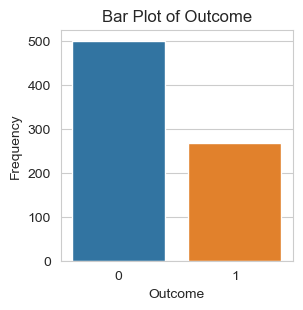

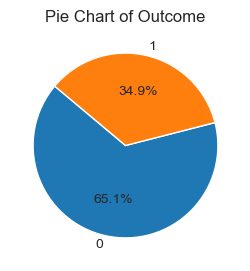

In [22]:


# Bar Plot for the Outcome feature
monem3.figure(figsize=(3, 3))
outcome_counts = data['Outcome'].value_counts()
monem2.barplot(x=outcome_counts.index, y=outcome_counts.values)
monem3.title('Bar Plot of Outcome')
monem3.xlabel('Outcome')
monem3.ylabel('Frequency')
monem3.show()

# Pie Chart for the 'Outcome' feature
monem3.figure(figsize=(3, 3))
monem3.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140)
monem3.title('Pie Chart of Outcome')
monem3.show()

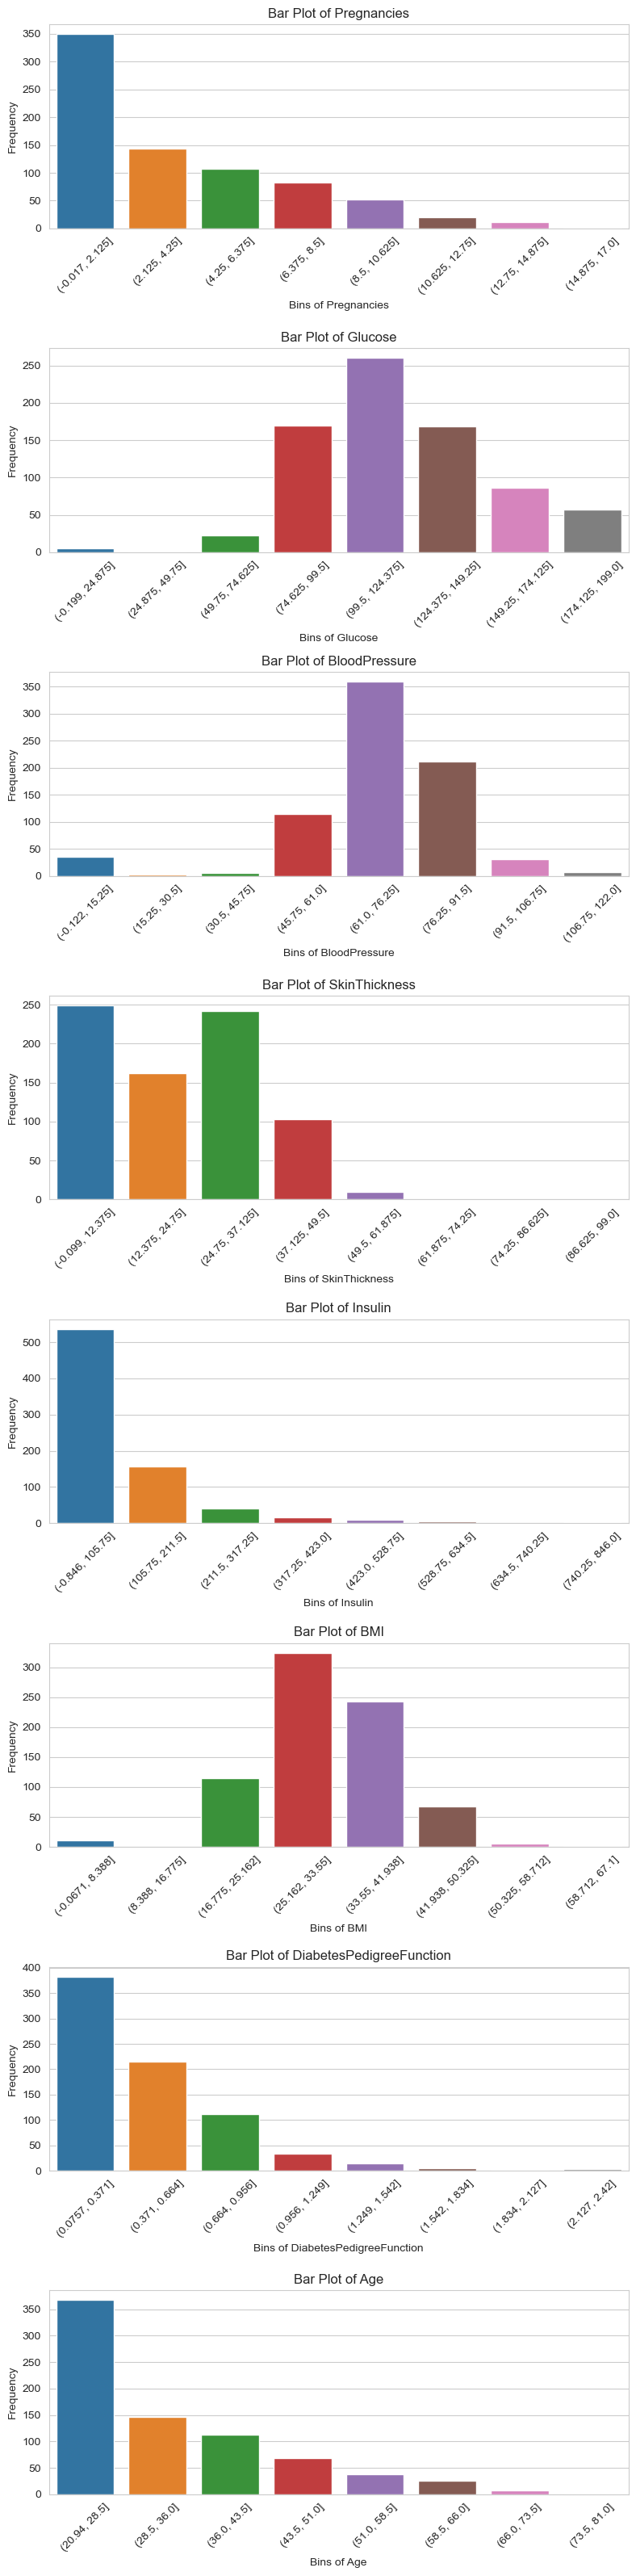

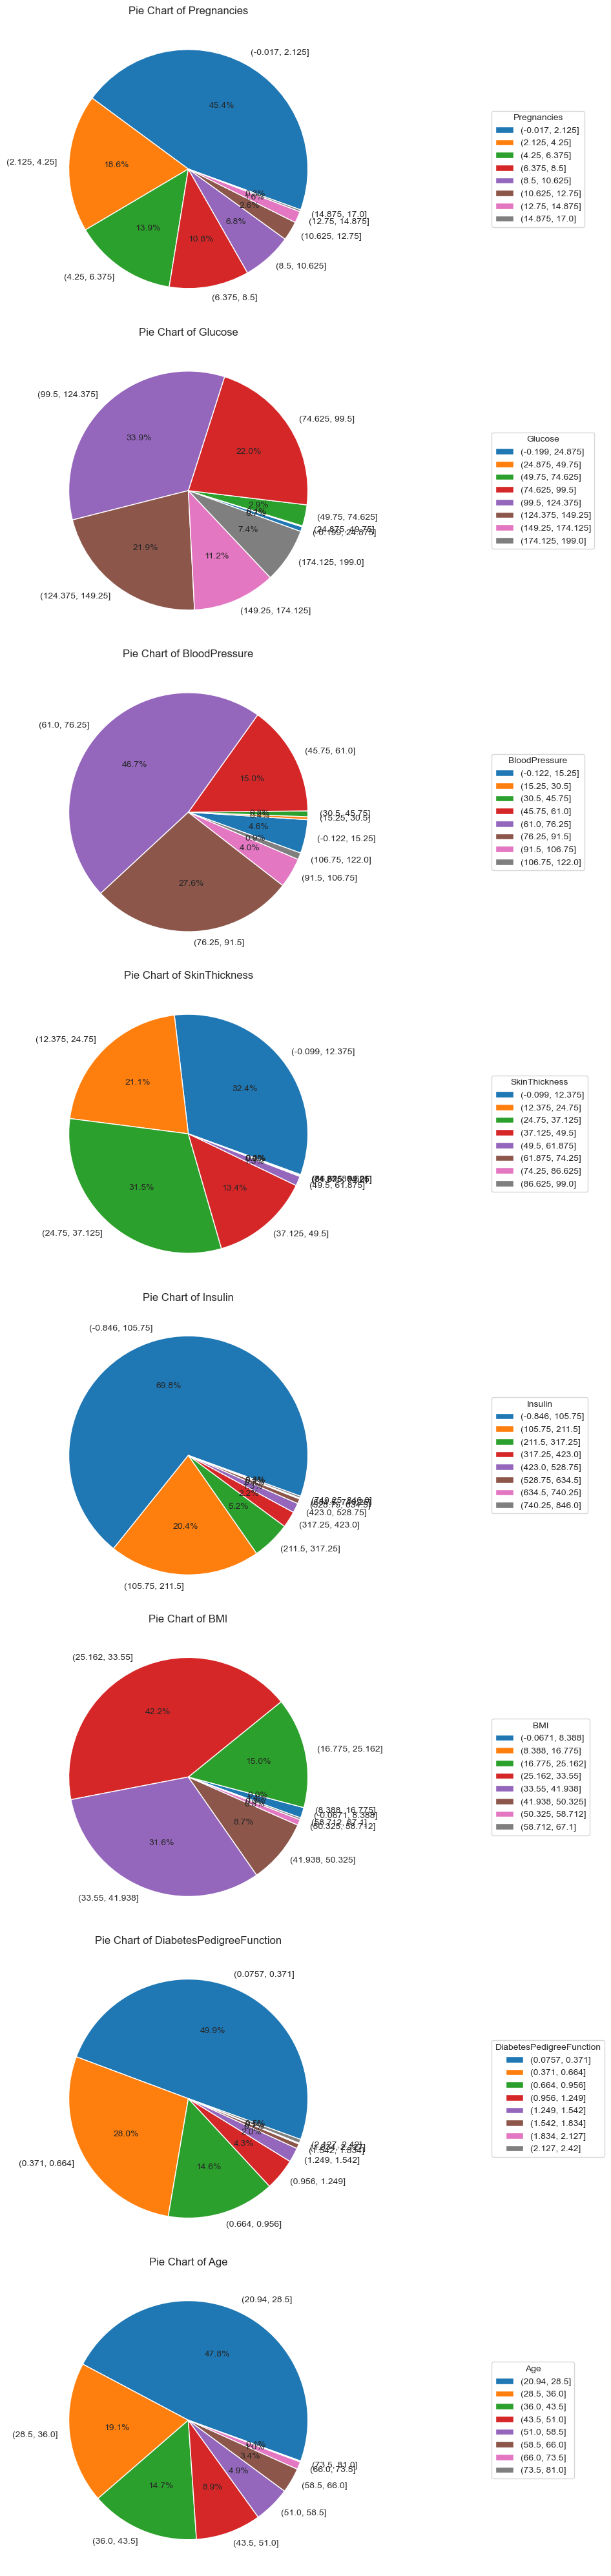

In [45]:
# Determine the number of bins for histograms
num_bins = 8

# Create a figure for bar plots
fig_bar, axs_bar = monem3.subplots(len(features_to_plot), 1, figsize=(8, 4 * len(features_to_plot)))
# Create a figure for pie charts
fig_pie, axs_pie = monem3.subplots(len(features_to_plot), 1, figsize=(10, 5 * len(features_to_plot)))

# Flatten the array of axes if there is more than one row
if len(features_to_plot) > 1:
    axs_bar = axs_bar.flatten()
    axs_pie = axs_pie.flatten()

# Iterate over each feature to create a bar plot and a pie chart
for i, feature in enumerate(features_to_plot):
    # Create bins for the feature
    data['binned'] = monem.cut(data[feature], bins=num_bins)
    # Calculate counts for each bin
    counts = data['binned'].value_counts(sort=False)

    # Bar plot
    monem2.barplot(x=counts.index.astype(str), y=counts.values, ax=axs_bar[i])
    axs_bar[i].set_title(f'Bar Plot of {feature}')
    axs_bar[i].set_xlabel('Bins of ' + feature)
    axs_bar[i].set_ylabel('Frequency')
    axs_bar[i].tick_params(axis='x', rotation=45)

    # Pie chart
    axs_pie[i].pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=340)
    axs_pie[i].set_title(f'Pie Chart of {feature}')
    axs_pie[i].legend(title=feature, loc='center left', bbox_to_anchor=(1.5, 0, 0.5, 1))


# Adjust the layout
fig_bar.tight_layout()
fig_pie.tight_layout()

# Show the plots
monem3.show()


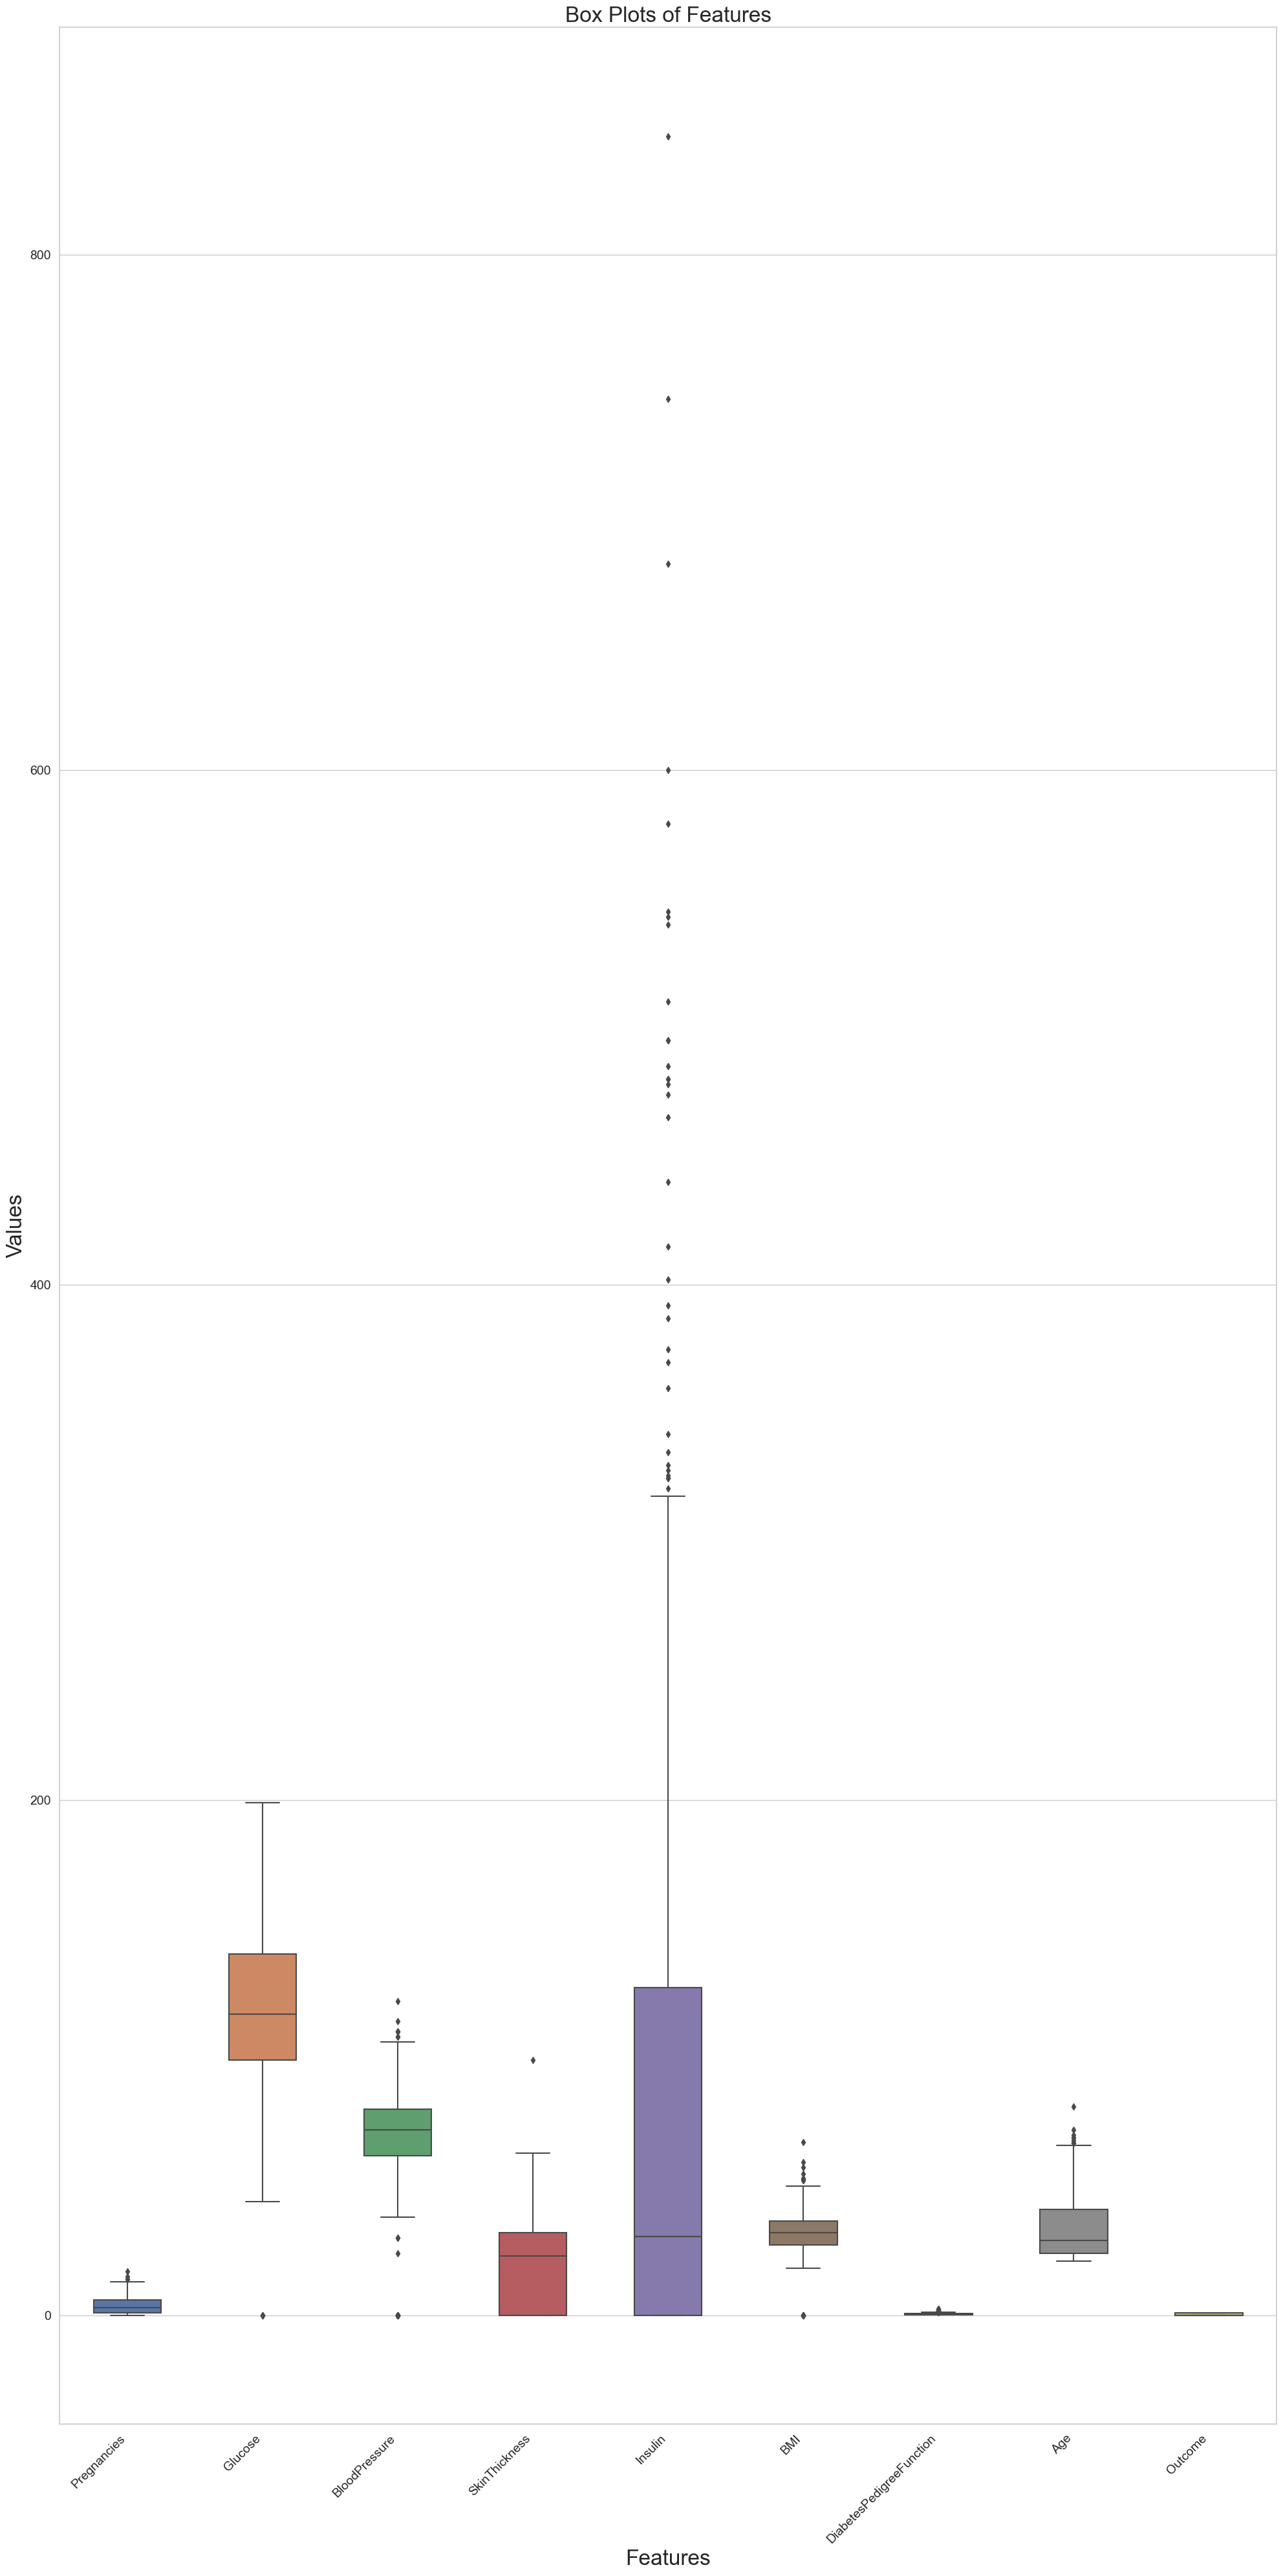

In [67]:
# Set up the matplotlib figure
monem2.set_theme(style='whitegrid')
monem3.figure(figsize=(20,40))
# Specify the features to include in the box plots
features_to_plot = data.columns

# Create box plots for each feature
monem2.boxplot(data=data[features_to_plot], width=0.5)

# Set the title and labels
monem3.title('Box Plots of Features',fontsize=24)
monem3.xlabel('Features', fontsize=24)
monem3.ylabel('Values', fontsize=24)

# Rotate x-axis labels for better readability
monem3.xticks(rotation=45, ha='right' ,fontsize=14)
monem3.yticks(fontsize=14)
monem3.tight_layout()


# Show the plot
monem3.show()

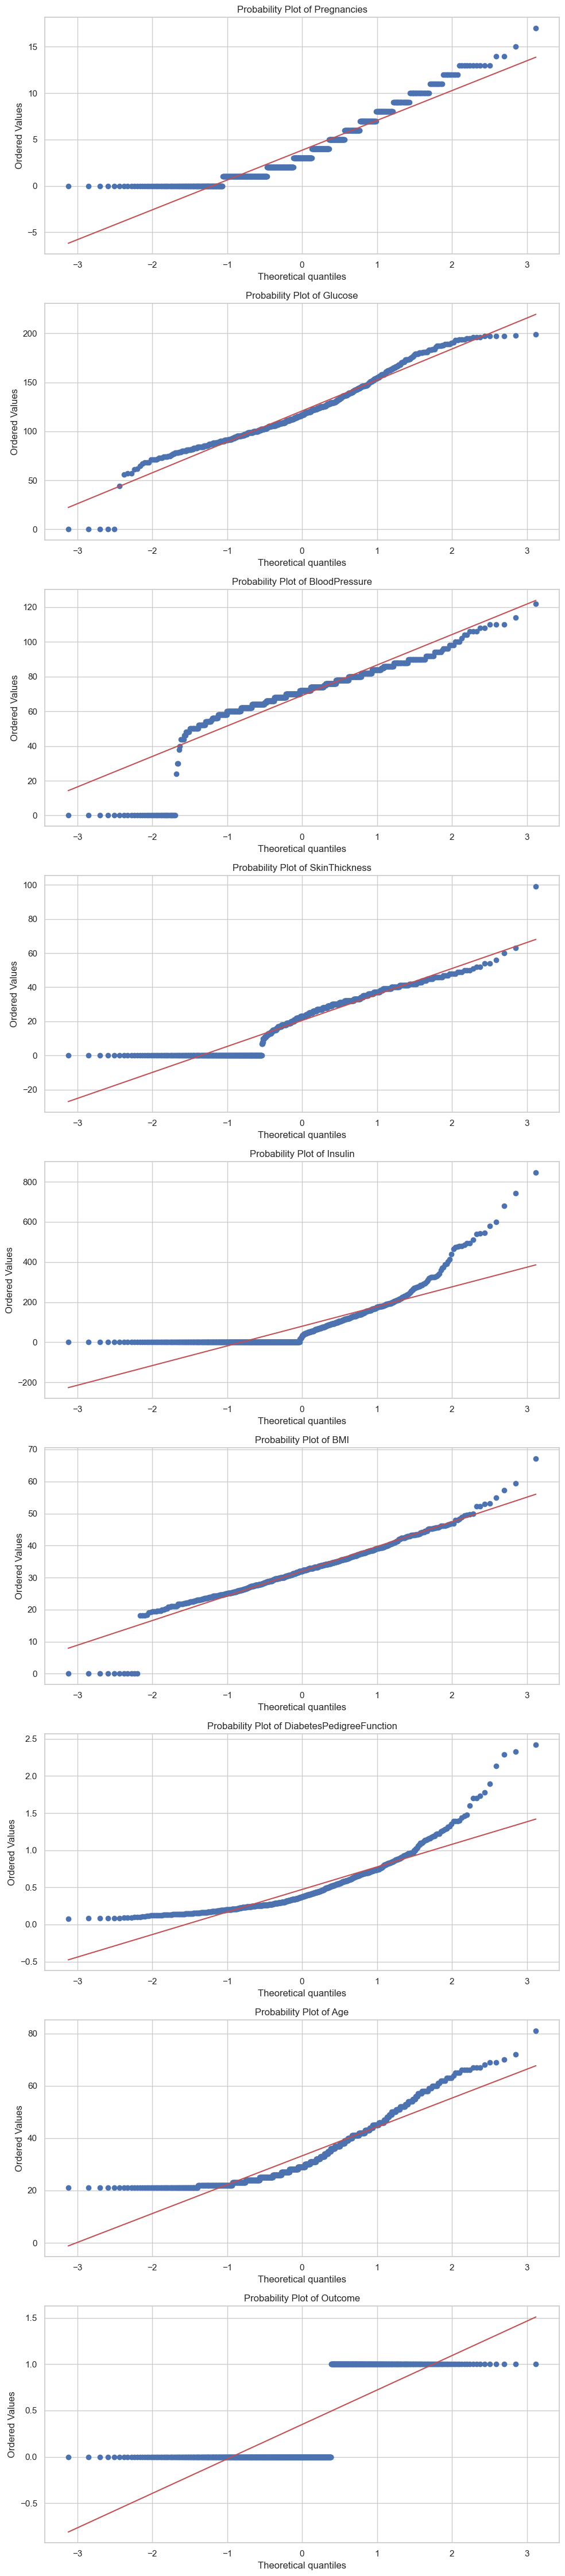

In [70]:

#probability plots

# Filter out non-numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Create a figure for probability plots
fig = monem3.figure(figsize=(10, 5 * len(numeric_columns)))

# Iterate over each numeric feature to create a probability plot
for i, feature in enumerate(numeric_columns):
    ax = fig.add_subplot(len(numeric_columns), 1, i+1)
    stats.probplot(data[feature], dist="norm", plot=ax)
    ax.set_title(f'Probability Plot of {feature}')

# Adjust the layout
fig.tight_layout()

monem3.show()
# Show the plot

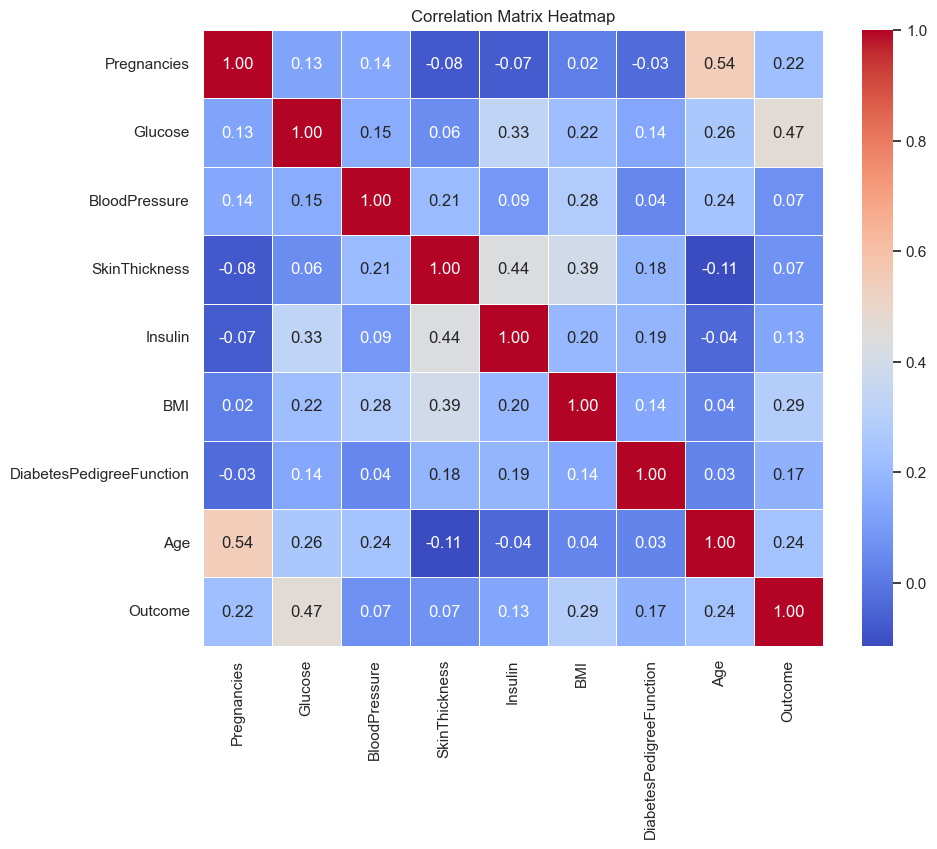

In [75]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include='number')
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()
# Set up the matplotlib figure
monem3.figure(figsize=(10, 8))
# Create a heatmap using seaborn
monem2.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set the title of the plot
monem3.title('Correlation Matrix Heatmap')
# Show the plot
monem3.show()

In [87]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Calculate and display Mean, Median, Mode for numeric columns
means = data[numeric_columns].mean()
medians = data[numeric_columns].median()
modes = data[numeric_columns].mode().iloc[0]
print("Central Tendency:")
print("Means:\n", means)
print("\nMedians:\n", medians)
print("\nModes:\n", modes)


Central Tendency:
Means:
 Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

Medians:
 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

Modes:
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPedigreeFunction     0

In [90]:
# Calculate and display Standard Deviation and Variance
numeric_columns = data.select_dtypes(include=['number']).columns

std_dev = data[numeric_columns].std()
variance =  data[numeric_columns].var()

print("Standard Deviations:\n", std_dev)
print("\nVariances:\n", variance)

Standard Deviations:
 Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

Variances:
 Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64


In [91]:
quantiles = [0.25, 0.50, 0.75]

# Calculate and display quantiles for numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
data_quantiles = data[numeric_columns].quantile(quantiles)

# Display the quantiles
print("Quantiles:")
print(data_quantiles)

Quantiles:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0.25          1.0    99.00           62.0            0.0     0.00  27.3   
0.50          3.0   117.00           72.0           23.0    30.50  32.0   
0.75          6.0   140.25           80.0           32.0   127.25  36.6   

      DiabetesPedigreeFunction   Age  Outcome  
0.25                   0.24375  24.0      0.0  
0.50                   0.37250  29.0      0.0  
0.75                   0.62625  41.0      1.0  


In [93]:

# Calculate and display Minimum and Maximum Values
minimums = data.min()
maximums = data.max()

print("Minimum Values:\n", minimums)
print("\nMaximum Values:\n", maximums)

Minimum Values:
 Pregnancies                             0
Glucose                                 0
BloodPressure                           0
SkinThickness                           0
Insulin                                 0
BMI                                   0.0
DiabetesPedigreeFunction            0.078
Age                                    21
Outcome                                 0
binned                      (20.94, 28.5]
dtype: object

Maximum Values:
 Pregnancies                           17
Glucose                              199
BloodPressure                        122
SkinThickness                         99
Insulin                              846
BMI                                 67.1
DiabetesPedigreeFunction            2.42
Age                                   81
Outcome                                1
binned                      (73.5, 81.0]
dtype: object
